In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [3]:
x,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20)

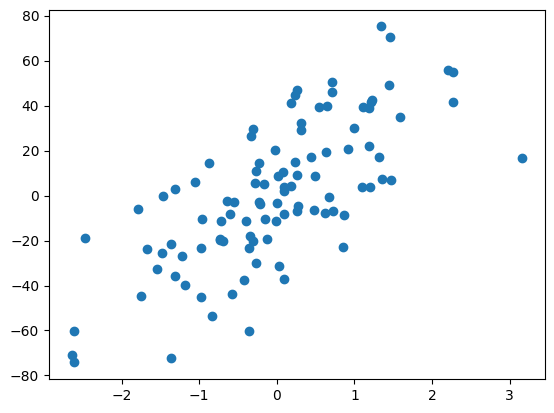

In [4]:
plt.scatter(x,y)

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lr = LinearRegression()

In [8]:
lr.fit(x_train,y_train)

LinearRegression()

In [9]:
print(lr.coef_)
print(lr.intercept_)

[18.34036726]
0.5553017818028809


In [10]:
y_pred = lr.predict(x_test)

In [11]:
from sklearn.metrics import r2_score

In [12]:
r2_score(y_test,y_pred)

0.6022961615933801

* **SELF ALGORITHM**

In [13]:
class MYRegressor:
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,x,y):
        # calculate the b using GD
        for i in range (self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m * x.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m * x.ravel() - self.b) * x.ravel())

            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)

    def predict(self,x):
        return self.m * x + self.b
        

In [14]:
gd = MYRegressor(0.001,50)

In [15]:
gd.fit(x_train,y_train)

18.334652696132263 0.5368264645455904


In [16]:
y_pred = gd.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6021148770803858